In [9]:
#IT24101966 - Feature Engineering

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define paths
data_path = '/content/rawDataset.csv'
results_path = '/content/results/'
eda_vis_path = results_path + 'eda_visualizations/'
os.makedirs(eda_vis_path, exist_ok=True)

In [10]:
# Load dataset
columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
           'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification",
           "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced',
           'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
           'Age at enrollment', 'International', 'Curricular units 1st sem (credited)',
           'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
           'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']
df = pd.read_csv(data_path, sep=';', names=columns, header=0)

In [11]:
# Feature Engineering
df['Avg_Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2
df['Total_Approved'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']

In [12]:
# Handle missing values
df['Avg_Grade'] = df['Avg_Grade'].fillna(0)
df['Total_Approved'] = df['Total_Approved'].fillna(0)

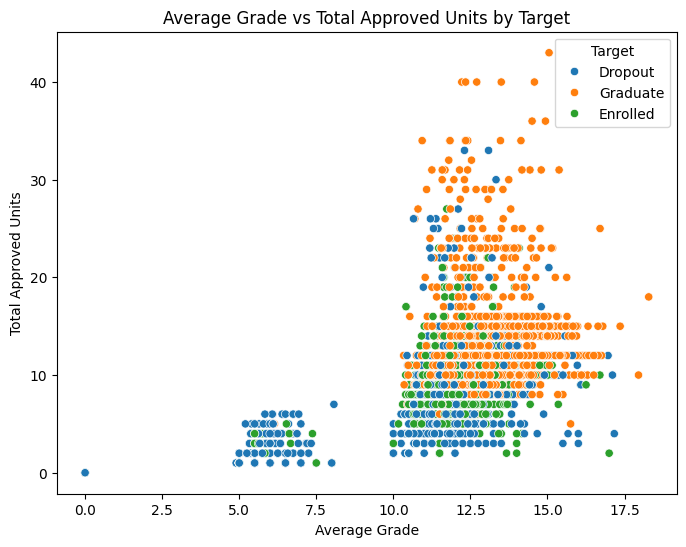

In [13]:
# Scatterplot of Avg_Grade vs Total_Approved
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Grade', y='Total_Approved', hue='Target', data=df)
plt.title("Average Grade vs Total Approved Units by Target")
plt.xlabel("Average Grade")
plt.ylabel("Total Approved Units")
plt.legend(title='Target')
plt.savefig(eda_vis_path + 'simple_scatterplot.png')
plt.show()

**Interpretation**


Students with higher average grades and more approved units are more likely to graduate.

Dropouts mostly appear in the low-grade and low-approved area, while graduates cluster in the higher ranges.